In [1]:
import matplotlib.pylab as pb
import numpy as np
from math import pi
from scipy.spatial.distance import cdist
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

# Question 12: Linear regression

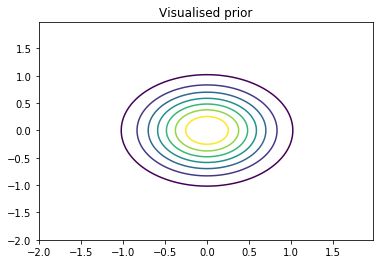

In [15]:

delta = 0.025
x = np.arange(-2.0, 2.0, delta)
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = mlab.bivariate_normal(X, Y, 0.5, 0.5, 0.0, 0.0)
plt.figure()
CS = plt.contour(X, Y, Z1)
#plt.clabel(CS, inline=1, fontsize=10)
plt.title('Visualised prior')
plt.show()


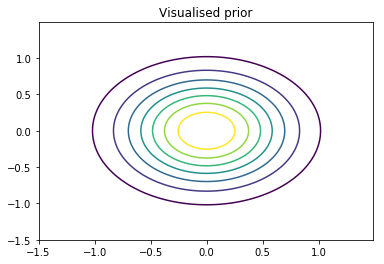

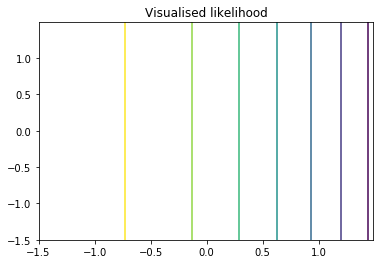

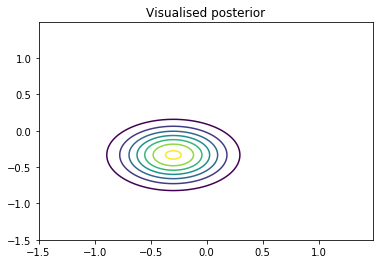

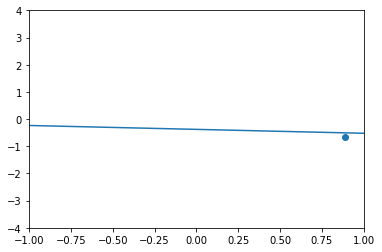

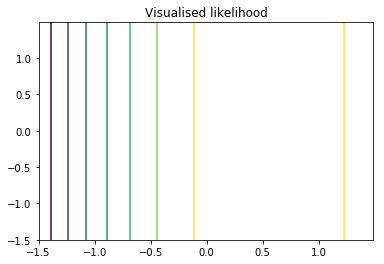

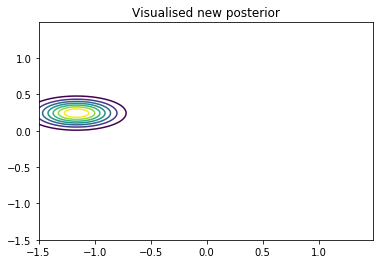

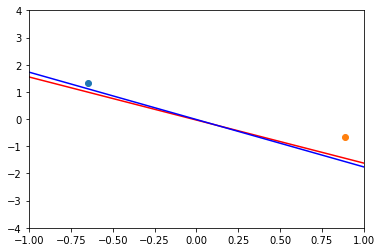

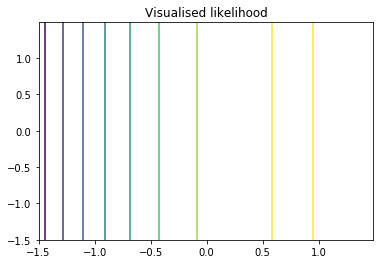

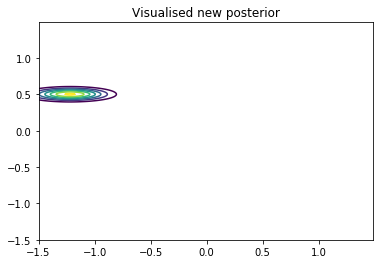

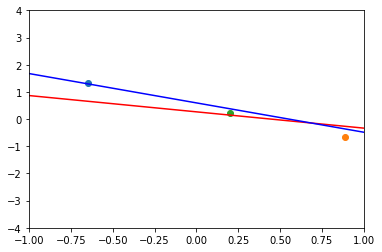

In [4]:
#likelihood = N(x|wT phi(x),beta)
delta = 0.01
sample = np.random.multivariate_normal([0,0],0.5 * np.identity(2))
x = np.arange(-1.5, 1.5, delta)
y = np.arange(-1.5, 1.5, delta)
X, Y = np.meshgrid(x, y)
Prior = mlab.bivariate_normal(X, Y, 0.5, 0.5, 0.0, 0.0)
beta = (1/0.3)**2
sample = np.reshape(sample,(-1,1))
sample = np.transpose(sample)
xSamp = [0.89,1]
xSamp = np.reshape(xSamp,(-1,1))
res = np.dot(sample, xSamp)
xSamp = xSamp.T
#print(np.shape(sample))
#print(res)
Yi = -1.3*0.89 + 0.5
oldY = Yi
#print(Yi)
Likelihood = mlab.normpdf(X,res,beta)
Sn = np.linalg.inv(np.linalg.inv(0.5*np.identity(2)) + beta*xSamp.T.dot(xSamp))
#print(Sn)
Mn = Sn.dot(np.linalg.inv(0.5*np.identity(2)).dot([0,0]) + beta*xSamp.T.dot([Yi]))
#print(Mn)
Posterior = (mlab.bivariate_normal(X,Y,Sn[0,0],Sn[1,1],Mn[0],Mn[1]))
newW = np.random.multivariate_normal(Mn,Sn)
#print(newW)
sampY = [newW[0]*(-1) + newW[1],newW[0]*(1) + newW[1]]
#Posterior = (Likelihood * Prior)
#Posterior = mlab.bivariate_normal(X,Y,0.26195473,0.26195473,0.11032092,0.11032092,-0.23804527)


plt.figure()
cs = plt.contour(X,Y,Prior)
plt.title('Visualised prior')
plt.figure()
cs2 = plt.contour(X,Y,Likelihood)
plt.title('Visualised likelihood')
plt.figure()
cs3 = plt.contour(X,Y,Posterior)
plt.title('Visualised posterior')
plt.figure()
plt.axis([-1,1,-4,4])
plt.plot([-1,1],[sampY[0],sampY[1]])
plt.scatter(0.89,Yi)

#likelihood = N(x|wT phi(x),beta)
sample = np.random.multivariate_normal([0,0],0.5 * np.identity(2))
#x = np.arange(-2.0, 2.0, delta)
#y = np.arange(-2.0, 2.0, delta)
#X, Y = np.meshgrid(x, y)
#Prior = mlab.bivariate_normal(X, Y, 0.5, 0.5, 0.0, 0.0)
beta = (1/0.3)**2
sample = np.reshape(sample,(-1,1))
sample = np.transpose(sample)
xSamp = [-0.65,1]
Yi = -1.3*xSamp[0] + 0.5
oldY2 = Yi
xSamp = np.reshape(xSamp,(-1,1))
res = np.dot(sample, xSamp)
xSamp = xSamp.T
#print(xSamp)

#print(np.shape(sample))
#print(res)
Likelihood = mlab.normpdf(X,res,beta)
Sn = np.linalg.inv(np.linalg.inv([Sn[0,0],Sn[1,1]]*np.identity(2)) + beta*xSamp.T.dot(xSamp))
Mn = Sn.dot(np.linalg.inv([Sn[0,0],Sn[1,1]]*np.identity(2)).dot(Mn) + beta*xSamp.T.dot([Yi]))
#Posterior = Likelihood * Posterior
Posterior = (mlab.bivariate_normal(X,Y,Sn[0,0],Sn[1,1],Mn[0],Mn[1]))
newW = np.random.multivariate_normal(Mn,Sn)
newW2 = np.random.multivariate_normal(Mn,Sn)

sampY = [newW[0]*(-1) + newW[1],newW[0]*(1) + newW[1]]
sampY2 = [newW2[0]*(-1) + newW2[1],newW2[0]*(1) + newW2[1]]


plt.figure()
cs5 = plt.contour(X,Y,Likelihood)
plt.title('Visualised likelihood')
plt.figure()
cs6 = plt.contour(X,Y,Posterior)
plt.title('Visualised new posterior')
plt.figure()
plt.axis([-1,1,-4,4])
plt.plot([-1,1],[sampY[0],sampY[1]],'r')
plt.plot([-1,1],[sampY2[0],sampY2[1]],'b')
plt.scatter(-0.65,oldY2)
plt.scatter(0.89,oldY)
plt.show()

#likelihood = N(x|wT phi(x),beta)
sample = np.random.multivariate_normal([0,0],0.5 * np.identity(2))
#x = np.arange(-2.0, 2.0, delta)
#y = np.arange(-2.0, 2.0, delta)
#X, Y = np.meshgrid(x, y)
#Prior = mlab.bivariate_normal(X, Y, 0.5, 0.5, 0.0, 0.0)
beta = (1/0.3)**2
sample = np.reshape(sample,(-1,1))
sample = np.transpose(sample)
xSamp = [0.2,1]
Yi = -1.3*xSamp[0] + 0.5
xSamp = np.reshape(xSamp,(-1,1))
res = np.dot(sample, xSamp)
xSamp = xSamp.T
#print(xSamp)

#print(np.shape(sample))
#print(res)
Likelihood = mlab.normpdf(X,res,beta)
Sn = np.linalg.inv(np.linalg.inv([Sn[0,0],Sn[1,1]]*np.identity(2)) + beta*xSamp.T.dot(xSamp))
Mn = Sn.dot(np.linalg.inv([Sn[0,0],Sn[1,1]]*np.identity(2)).dot(Mn) + beta*xSamp.T.dot([Yi]))
#Posterior = Likelihood * Posterior
Posterior = (mlab.bivariate_normal(X,Y,Sn[0,0],Sn[1,1],Mn[0],Mn[1]))
newW = np.random.multivariate_normal(Mn,Sn)
newW2 = np.random.multivariate_normal(Mn,Sn)

sampY = [newW[0]*(-1) + newW[1],newW[0]*(1) + newW[1]]
sampY2 = [newW2[0]*(-1) + newW2[1],newW2[0]*(1) + newW2[1]]

plt.figure()
cs7 = plt.contour(X,Y,Likelihood)
plt.title('Visualised likelihood')
plt.figure()
cs8 = plt.contour(X,Y,Posterior)
plt.title('Visualised new posterior')
plt.figure()
plt.axis([-1,1,-4,4])
plt.plot([-1,1],[sampY[0],sampY[1]],'r')
plt.plot([-1,1],[sampY2[0],sampY2[1]],'b')
plt.scatter(-0.65,oldY2)
plt.scatter(0.89,oldY)
plt.scatter(0.2,Yi)
plt.show()